In [45]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key
from api_keys import weather_api_key
#weather_api_key = "8cd4736d483d70d5a0e43dafcede37bf"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# Set the API base URL
#url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
#url = f"https://api.openweathermap.org/data/2.5/weather?"
#appid={weather_api_key}
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Number of cities in the list: 599
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | felidhoo
City not found. Skipping...
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | la libertad
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | thal
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | camana
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | haiku-pauwela
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | kailua-kona
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,284.27,83,65,4.47,NZ,1714869500
1,hawaiian paradise park,19.5933,-154.9731,298.88,79,100,5.66,US,1714869501
2,adamstown,-25.0660,-130.1015,294.21,64,72,8.79,PN,1714869502
3,blackmans bay,-43.0167,147.3167,285.78,70,0,1.34,AU,1714869502
4,la libertad,-2.2333,-80.9000,297.69,79,65,3.45,EC,1714869503


In [48]:
# Export the City_Data into a csv
output_data_file = "output_data/cities.csv"
city_data_df.to_csv("output_data_file/cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("output_data_file/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,284.27,83,65,4.47,NZ,1714869500
1,hawaiian paradise park,19.5933,-154.9731,298.88,79,100,5.66,US,1714869501
2,adamstown,-25.0660,-130.1015,294.21,64,72,8.79,PN,1714869502
3,blackmans bay,-43.0167,147.3167,285.78,70,0,1.34,AU,1714869502
4,la libertad,-2.2333,-80.9000,297.69,79,65,3.45,EC,1714869503


In [50]:
#clean data for use and provide varialbes for passing expressions
city_data_df = pd.DataFrame(city_data)
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# Export the City_Data into a csv
city_data_df.to_csv("output_data_file/cities.csv", index_label="City_ID")

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,284.27,83,65,4.47,NZ,1714869500
1,hawaiian paradise park,19.5933,-154.9731,298.88,79,100,5.66,US,1714869501
2,adamstown,-25.0660,-130.1015,294.21,64,72,8.79,PN,1714869502
3,blackmans bay,-43.0167,147.3167,285.78,70,0,1.34,AU,1714869502
4,la libertad,-2.2333,-80.9000,297.69,79,65,3.45,EC,1714869503
...,...,...,...,...,...,...,...,...,...
571,papao,-17.7500,-149.5500,303.97,80,10,7.61,PF,1714869800
572,severnoye,56.3491,78.3619,279.81,94,96,3.58,RU,1714869801
573,sanctuary point,-35.1114,150.6290,288.01,87,100,2.26,AU,1714869801
574,souda,35.4844,24.0744,288.78,88,75,2.06,GR,1714869802


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

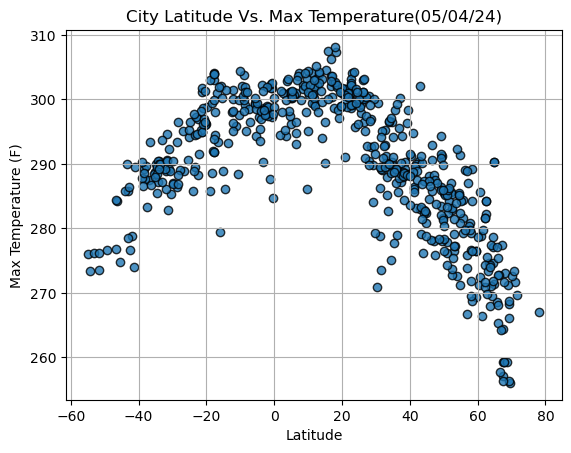

In [51]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,max_temps,edgecolor="black", linewidth=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data_file/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

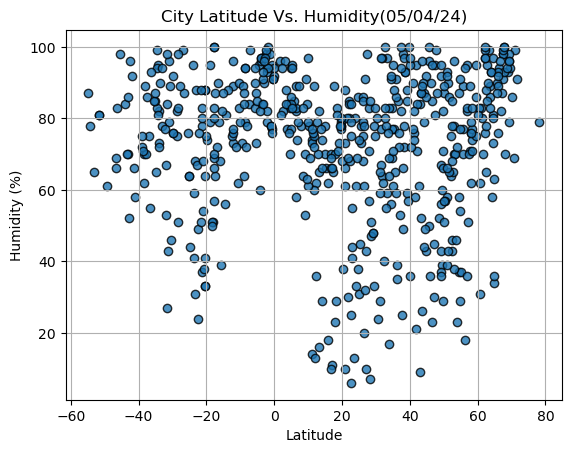

In [52]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data_file/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

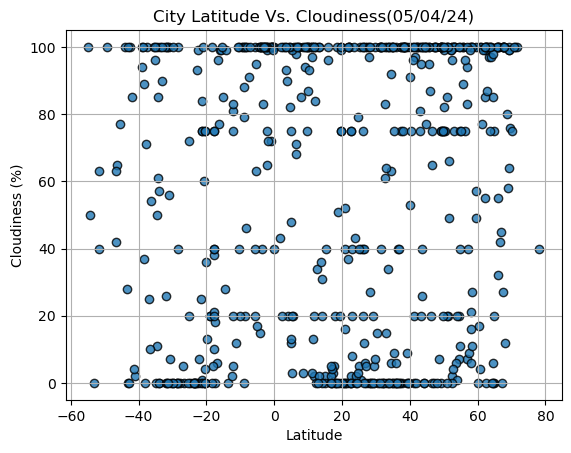

In [53]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data_file/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

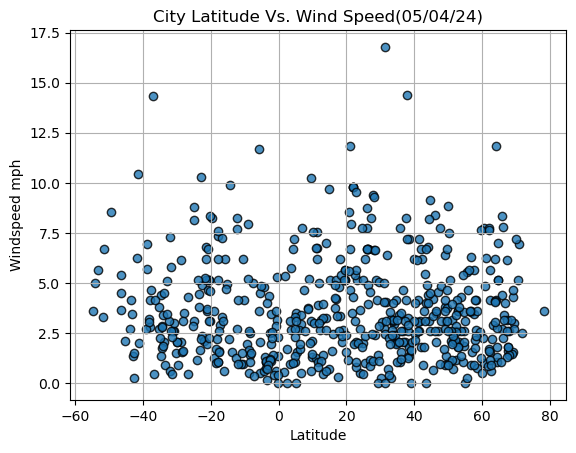

In [54]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data_file/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [56]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hawaiian paradise park,19.5933,-154.9731,298.88,79,100,5.66,US,1714869501
5,bethel,41.3712,-73.4140,286.36,76,0,2.57,US,1714869503
6,thal,35.4791,72.2439,277.78,77,9,3.37,PK,1714869504
7,olonkinbyen,70.9221,-8.7187,271.72,99,100,6.96,SJ,1714869504
8,yellowknife,62.4560,-114.3525,282.27,65,0,4.12,CA,1714869505


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,284.27,83,65,4.47,NZ,1714869500
2,adamstown,-25.0660,-130.1015,294.21,64,72,8.79,PN,1714869502
3,blackmans bay,-43.0167,147.3167,285.78,70,0,1.34,AU,1714869502
4,la libertad,-2.2333,-80.9000,297.69,79,65,3.45,EC,1714869503
9,camana,-16.6228,-72.7111,293.40,90,96,3.28,PE,1714869505


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8598031633063713


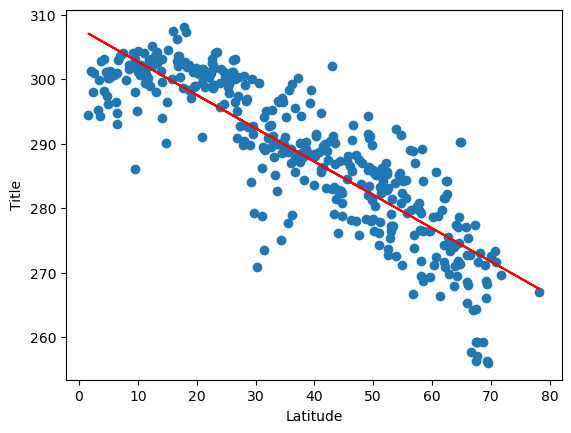

In [68]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.savefig("output_data_file/Fig5.png")
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.767292170214331


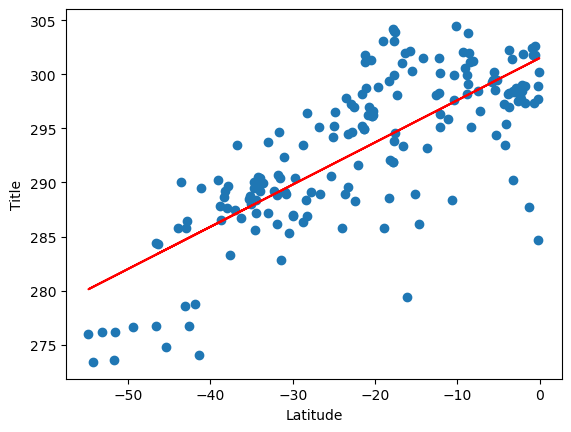

In [69]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.savefig("output_data_file/Fig6.png")
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.15130557277430468


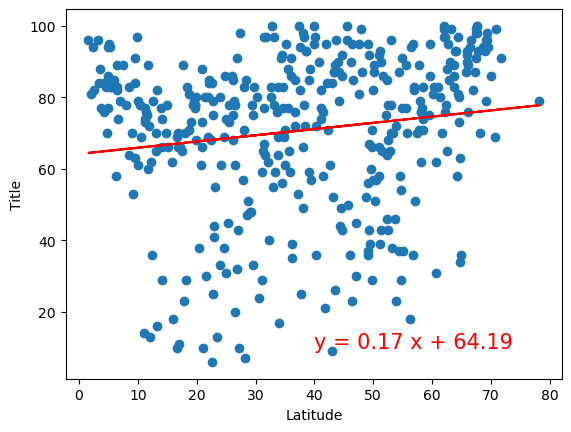

In [70]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.savefig("output_data_file/Fig7.png")
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.21594556363304046


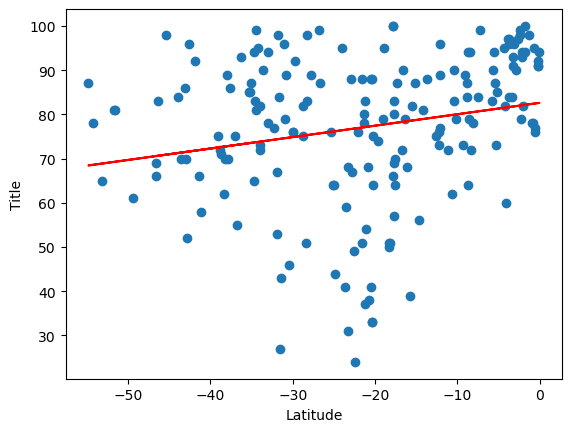

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.savefig("output_data_file/Fig8.png")
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.1531882561619214


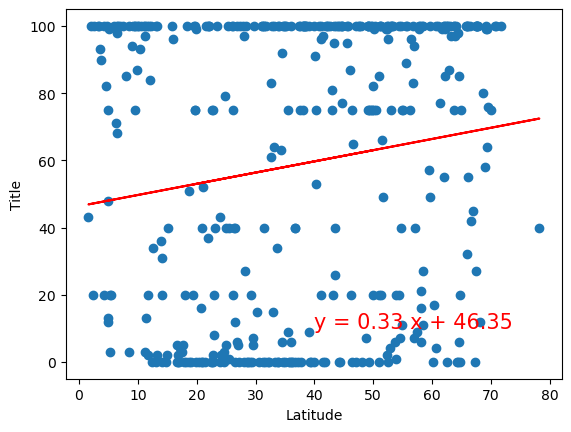

In [72]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.savefig("output_data_file/Fig9.png")
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.22958388044414657


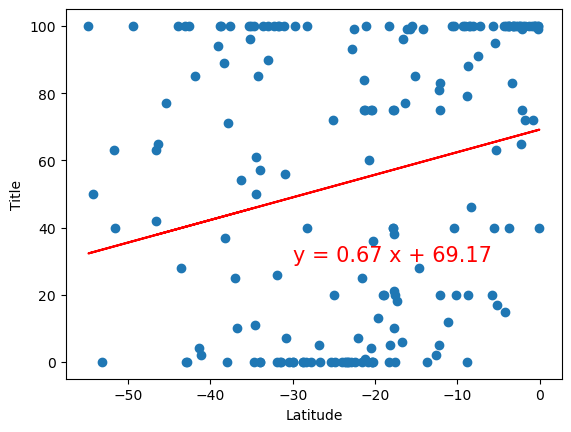

In [73]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.savefig("output_data_file/Fig10.png")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.0374117796767699


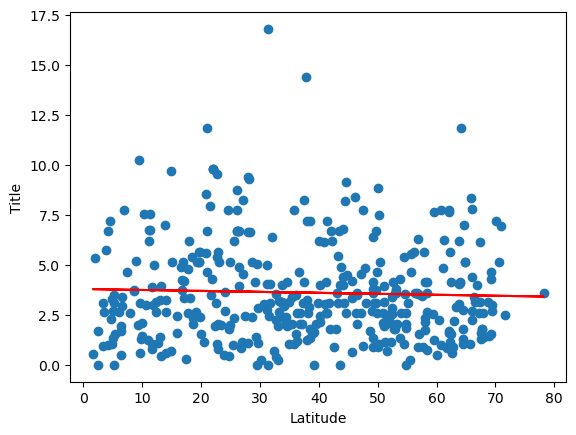

In [74]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt.savefig("output_data_file/Fig11.png")
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.20925471339150092


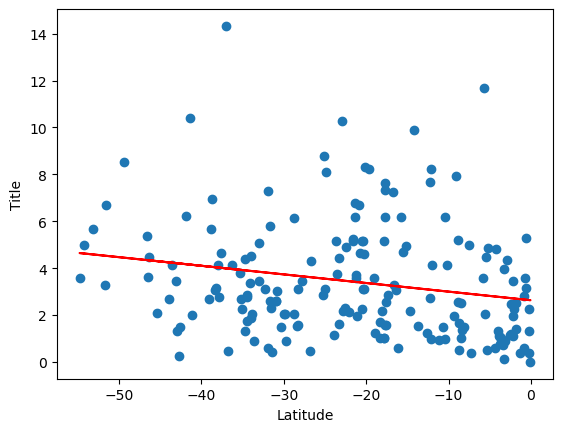

In [75]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt.savefig("output_data_file/Fig12.png")
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))